# Supervised learning ML models
Candidates:
- KNN
- SVM Classifier
- Elastic Net
- Naive Bayes
- Gaussian Process
- XGBoost

Note to-do:
- change metric from accuracy to weighted log-loss
- deal with labels imbalance problem
- grid search of optimal hyperparameters
  - KNN: num neighbors k
  - SVM: regularization parameter C ??
- Should we consider time step as a feature
- visualize in 2d とか

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

## 0. Data

In [2]:
data = pd.read_csv('../../Datasets/date-recession-monthly-6-indices-proc.csv')
data.head()

,DATE,Time_step,F1-T10Y2Y_norm,F3-IC4WSA_norm,F4-PERMIT_norm,F5-NFCICREDIT_norm,F6-UMCSENT_norm,F7-A576RC1_norm,Recession,Recession_within_6mo,Recession_within_12mo
0,1978-01-31,0,0.524392,0.038496,0.701143,0.351203,0.543548,0.014578,0,0,0
1,1978-02-28,1,0.523961,0.042729,0.698857,0.393372,0.553226,0.015577,0,0,0
2,1978-03-31,2,0.522467,0.041980,0.734857,0.425639,0.464516,0.017030,0,0,0
3,1978-04-30,3,0.512325,0.034445,0.820000,0.446548,0.509677,0.018732,0,0,0
4,1978-05-31,4,0.498043,0.032777,0.716000,0.458441,0.530645,0.019435,0,0,0


In [3]:
# X = data.drop(columns=['DATE', 'Recession', 'Recession_within_6mo', 'Recession_within_12mo'], axis=1)
X = data.drop(columns=['Time_step', 'DATE', 'Recession', 'Recession_within_6mo', 'Recession_within_12mo'], axis=1)
y = data['Recession_within_6mo']
# y = data['Recession']
# y_6 = data['Recession_within_6mo']
# y_12 = data['Recession_within_12mo']

test_size = 0.4
train_size = 1 - test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

In [4]:
X_train

,F1-T10Y2Y_norm,F3-IC4WSA_norm,F4-PERMIT_norm,F5-NFCICREDIT_norm,F6-UMCSENT_norm,F7-A576RC1_norm
0,0.524392,0.038496,0.701143,0.351203,0.543548,0.014578
1,0.523961,0.042729,0.698857,0.393372,0.553226,0.015577
2,0.522467,0.041980,0.734857,0.425639,0.464516,0.017030
3,0.512325,0.034445,0.820000,0.446548,0.509677,0.018732
4,0.498043,0.032777,0.716000,0.458441,0.530645,0.019435
...,...,...,...,...,...,...
319,0.786510,0.036178,0.881714,0.338764,0.740323,0.425910
320,0.751760,0.035511,0.873143,0.340123,0.712903,0.427464
321,0.734058,0.035423,0.905143,0.334430,0.672581,0.429092
322,0.699752,0.033943,0.894857,0.333675,0.690323,0.428630


In [5]:
X_test

,F1-T10Y2Y_norm,F3-IC4WSA_norm,F4-PERMIT_norm,F5-NFCICREDIT_norm,F6-UMCSENT_norm,F7-A576RC1_norm
324,0.630737,0.036067,0.929143,0.331503,0.733871,0.431867
325,0.586778,0.031084,0.914857,0.334453,0.711290,0.433255
326,0.584843,0.032541,0.885143,0.332702,0.687097,0.433847
327,0.567988,0.033002,0.935429,0.336785,0.608065,0.436881
328,0.530429,0.032597,0.898286,0.354515,0.595161,0.438583
...,...,...,...,...,...,...
536,0.361795,0.009180,0.600571,0.411358,0.138710,0.976532
537,0.350954,0.007940,0.570857,0.422115,0.159677,0.981749
538,0.306486,0.010263,0.478857,0.409012,0.109677,0.986078
539,0.294438,0.009972,0.470857,0.407195,0.156452,0.990056


In [6]:
y.value_counts()

0    447
1     94
Name: Recession_within_6mo, dtype: int64

## 1. KNN Classifier
- a non-parametric model
- key considerations: 
  - k value (too small -> overfit, too large -> oversmooth) 
  - distance metric 
  - data should be normalized

In [7]:
k = 4
knn = KNeighborsClassifier(n_neighbors=k, weights='distance')

In [8]:
class_weights = {}
unique_classes = set(y_train)
for cls in unique_classes:
    class_weights[cls] = 1.0 / (y_train[y_train == cls].shape[0])

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [10]:
y_pred = knn.predict(X_test)

📌 Note: high acc, but bc it always predict 0 -> labels imbalance problem

k=5:
- acc: 0.926605504587156

In [11]:
acc = accuracy_score(y_test, y_pred)
print(f"acc: {acc}")

acc: 0.543778801843318


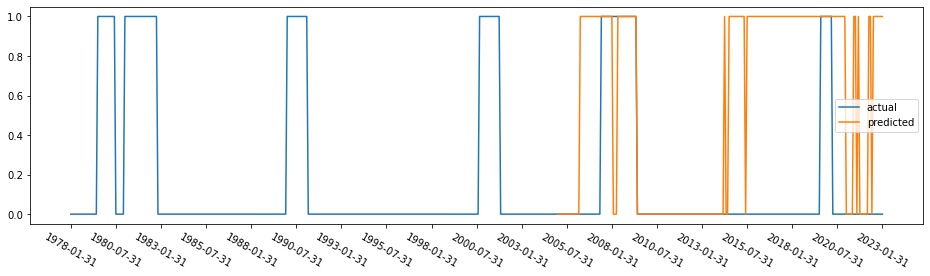

In [12]:
t = list(data['DATE'])

fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(4)
ax.plot(t, y, label='actual')
ax.plot(t[int(train_size*len(t)):], y_pred, label='predicted')
ax.tick_params(axis='x', labelrotation=-30)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

plt.legend()
plt.show()

## 2. SVM

In [13]:
svm_classifier = SVC(C=1, class_weight='balanced')
# svm_classifier = SVC(C=1, kernel='rbf', probability=True,
#                               tol=1e-3, random_state=123,
#                               class_weight='balanced')
svm_classifier.fit(X_train, y_train)

SVC(C=1, class_weight='balanced')

In [14]:
y_pred = svm_classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
# cls_report = classification_report(y_test, y_pred)

print('Accuracy:', acc)
# print('Classification Report:')
# print(classification_report)

Accuracy: 0.35944700460829493


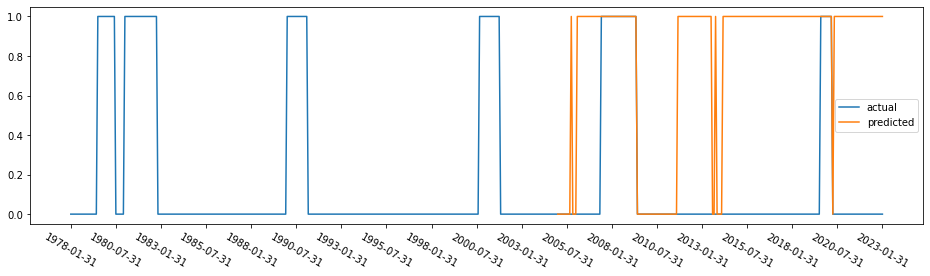

In [15]:
t = list(data['DATE'])

fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(4)
ax.plot(t, y, label='actual')
ax.plot(t[int(train_size*len(t)):], y_pred, label='predicted')
ax.tick_params(axis='x', labelrotation=-30)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

plt.legend()
plt.show()